# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [2]:
env = UnityEnvironment(file_name="VisualBanana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The environment state is an array of raw pixels with shape `(1, 84, 84, 3)`.  *Note that this code differs from the notebook for the project, where we are grabbing **`visual_observations`** (the raw pixels) instead of **`vector_observations`**.* A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

Number of agents: 1
Number of actions: 4
States look like:


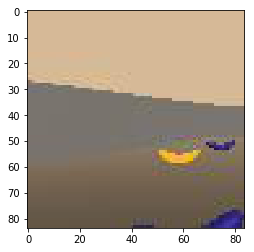

States have shape: (1, 84, 84, 3)


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

/home/akiyuki/.pyenv/versions/anaconda3-5.2.0/envs/drlnd/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/akiyuki/.pyenv/versions/anaconda3-5.2.0/envs/drlnd/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


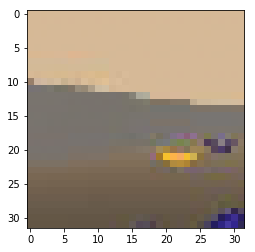

In [5]:
from skimage.transform import resize

re_state = resize(state, (1, 32, 32, 3))
plt.imshow(np.squeeze(re_state))
plt.show()

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [26]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.visual_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 2.0


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from agent import ImageAgent, PrioritizedAgent
from collections import deque
from matplotlib import pyplot as plt

results = {}

In [57]:
from skimage.transform import resize

def transform_state(state):
    state = resize(state, (1, 32, 32, 3))
    return np.transpose(state, (0, 3, 1, 2)).reshape(-1)

def run_dqn(env, agent, n_episode=1000):
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores

    for i_episode in range(n_episode):
        score = 0
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = transform_state(env_info.visual_observations[0]) # get the current state
        while True:
            action = agent.act(state)        # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = transform_state(env_info.visual_observations[0])   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score        
            state = next_state                             # roll over the state to next time step

            if done:                                       # exit loop if episode finished
                break
        agent.set_next_eps()
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}\teps{:.2f}\tFilledBuff:{:.2f}'.format(
            i_episode, np.mean(scores_window), agent.eps, agent.filled_buffer_ratio()), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}\teps{:.2f}\tFilledBuff:{:.2f}'.format(
                i_episode, np.mean(scores_window), agent.eps, agent.filled_buffer_ratio()))

    print("\n")
    print("Score: {}".format(score))
    return agent, scores

In [58]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
brain = env.brains[brain_name]
state = transform_state(env_info.visual_observations[0])            # get the current state
score = 0                                          # initialize the score
action_size = brain.vector_action_space_size
state_size = state.shape

### simple dqn
params = dict(use_double_dqn=False, eps_start=1.0, eps_end=0.001, eps_decay=0.995, seed=13)

agent = ImageAgent(state_size, action_size, **params)

agent, scores = run_dqn(env, agent, n_episode=700)
results["DQN"] = {"agent": agent, "score":scores, "params": params}

/home/akiyuki/.pyenv/versions/anaconda3-5.2.0/envs/drlnd/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/akiyuki/.pyenv/versions/anaconda3-5.2.0/envs/drlnd/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Episode 0	Average Score: -1.00	eps0.99	FilledBuff:0.01
Episode 100	Average Score: -0.01	eps0.60	FilledBuff:0.61
Episode 200	Average Score: 0.05	eps0.37	FilledBuff:1.000
Episode 300	Average Score: 0.30	eps0.22	FilledBuff:1.000
Episode 400	Average Score: 1.22	eps0.13	FilledBuff:1.00
Episode 500	Average Score: 1.61	eps0.08	FilledBuff:1.00
Episode 600	Average Score: 1.78	eps0.05	FilledBuff:1.00
Episode 699	Average Score: 0.96	eps0.03	FilledBuff:1.00

Score: 1.0


In [61]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
brain = env.brains[brain_name]
state = transform_state(env_info.visual_observations[0])            # get the current state
score = 0                                          # initialize the score
action_size = brain.vector_action_space_size
state_size = state.shape

### simple dqn
params = dict(use_double_dqn=True, eps_start=1.0, eps_end=0.001, eps_decay=0.995, seed=13)

agent = ImageAgent(state_size, action_size, **params)

agent, scores = run_dqn(env, agent, n_episode=700)
results["DoubleDQN"] = {"agent": agent, "score":scores, "params": params}

/home/akiyuki/.pyenv/versions/anaconda3-5.2.0/envs/drlnd/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/akiyuki/.pyenv/versions/anaconda3-5.2.0/envs/drlnd/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Episode 0	Average Score: -1.00	eps0.99	FilledBuff:0.01
Episode 100	Average Score: -0.08	eps0.60	FilledBuff:0.61
Episode 200	Average Score: 0.02	eps0.37	FilledBuff:1.000
Episode 300	Average Score: 0.29	eps0.22	FilledBuff:1.00
Episode 400	Average Score: 0.79	eps0.13	FilledBuff:1.00
Episode 500	Average Score: 1.29	eps0.08	FilledBuff:1.00
Episode 600	Average Score: 1.43	eps0.05	FilledBuff:1.00
Episode 699	Average Score: 1.71	eps0.03	FilledBuff:1.00

Score: 0.0


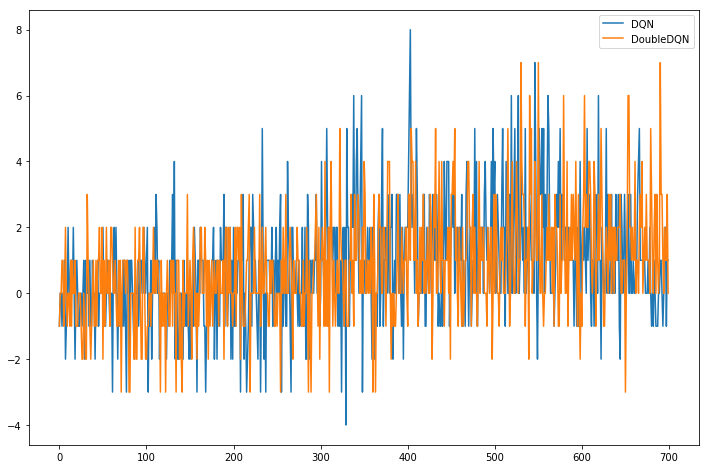

In [62]:
import pandas as pd
df_score = pd.DataFrame({k: v["score"] for k, v in results.items()})
ax = df_score.plot(figsize=(12, 8))